In [26]:
from tokenize import group
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense,Embedding, BatchNormalization
import matplotlib.pyplot as plt

In [27]:
group_size = 14
total = []
# print(group_size)
data = pd.read_excel('1.xlsx',sheet_name='Sheet1')
df = pd.DataFrame(data, columns= ['A+','A-','B+','B-', 'AB+', 'AB-', 'O+','O-'])

In [28]:
list = df.values.tolist()


In [43]:
print(list)

[[8, 0, 3, 0, 0, 0, 1, 2], [4, 0, 4, 0, 1, 0, 3, 2], [2, 0, 3, 0, 2, 0, 4, 0], [5, 0, 6, 0, 1, 0, 7, 3], [4, 2, 5, 2, 1, 0, 3, 0], [8, 2, 4, 0, 0, 0, 4, 0], [5, 0, 1, 0, 0, 0, 6, 3], [8, 0, 3, 0, 3, 0, 4, 0], [4, 0, 0, 1, 0, 0, 1, 0], [6, 0, 3, 1, 0, 0, 12, 0], [10, 0, 5, 0, 2, 0, 9, 1], [5, 0, 1, 0, 0, 0, 6, 1], [2, 2, 1, 1, 0, 0, 1, 0], [3, 1, 1, 0, 1, 0, 1, 0], [6, 0, 2, 0, 0, 0, 1, 1], [2, 0, 0, 0, 0, 0, 2, 0], [6, 0, 1, 0, 0, 0, 2, 0], [8, 0, 2, 0, 0, 0, 10, 1], [5, 0, 3, 0, 0, 0, 11, 1], [9, 1, 7, 1, 0, 0, 8, 0], [7, 0, 8, 0, 1, 0, 6, 0], [3, 0, 0, 0, 1, 0, 10, 1], [1, 0, 1, 0, 1, 0, 4, 0], [8, 0, 3, 0, 1, 0, 7, 0], [11, 2, 4, 0, 1, 0, 11, 0], [8, 1, 4, 1, 0, 0, 5, 0], [9, 0, 7, 0, 5, 0, 9, 0], [5, 0, 1, 0, 2, 0, 15, 1], [7, 0, 3, 0, 0, 0, 3, 1], [1, 0, 1, 0, 0, 0, 1, 0], [5, 0, 3, 1, 0, 0, 5, 0], [6, 3, 1, 0, 1, 0, 7, 0], [7, 2, 2, 2, 1, 1, 10, 0], [6, 3, 4, 0, 0, 0, 5, 0], [5, 0, 2, 0, 0, 0, 4, 1], [3, 2, 2, 0, 1, 0, 2, 2], [2, 0, 1, 0, 1, 0, 3, 0], [7, 1, 3, 0, 4, 0, 6, 0], [1

In [ ]:
total = np.array(list)

In [29]:
x = []
y = []

In [30]:
list = df.values.tolist()
total = np.array(list)

In [31]:
x = []
y = []

In [32]:
for i in range(len(list)-group_size):
    temp = total[i:i+group_size]
    x.append(temp)
    y.append(total[i+group_size])
x = np.array(x)
y = np.array(y)

In [33]:
train_x = x[:390]
train_y = y[:390]
test_x = x[390:]
test_y = y[390:]

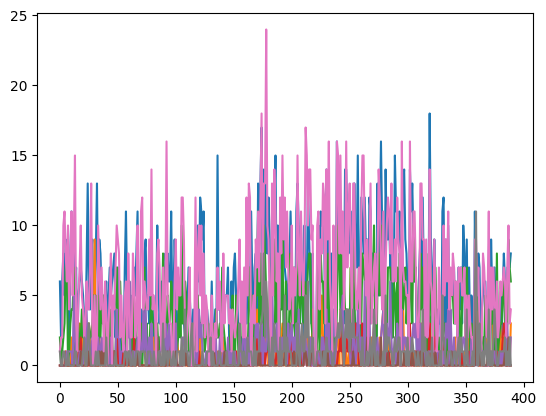

In [44]:
plt.plot(train_y, label='train')

In [34]:
model = Sequential()
# model.add(BatchNormalization())
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_x[0].shape)))
# model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dense(8))


In [35]:
model.compile(loss='mse', optimizer='adam')
# model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(train_x, train_y, epochs=22, batch_size=5, validation_data=(test_x, test_y), verbose=1, shuffle=False)


Epoch 1/22
78/78 [==============================] - 6s 25ms/step - loss: 7.0702 - val_loss: 5.5291
Epoch 2/22
78/78 [==============================] - 1s 11ms/step - loss: 5.6059 - val_loss: 5.2611
Epoch 3/22
78/78 [==============================] - 1s 11ms/step - loss: 5.5698 - val_loss: 5.2284
Epoch 4/22
78/78 [==============================] - 1s 11ms/step - loss: 5.5588 - val_loss: 5.2044
Epoch 5/22
78/78 [==============================] - 1s 11ms/step - loss: 5.5511 - val_loss: 5.1881
Epoch 6/22
78/78 [==============================] - 1s 11ms/step - loss: 5.5453 - val_loss: 5.1717
Epoch 7/22
78/78 [==============================] - 1s 11ms/step - loss: 5.5416 - val_loss: 5.1785
Epoch 8/22
78/78 [==============================] - 1s 11ms/step - loss: 5.5394 - val_loss: 5.1764
Epoch 9/22
78/78 [==============================] - 1s 11ms/step - loss: 5.5381 - val_loss: 5.1480
Epoch 10/22
78/78 [==============================] - 1s 11ms/step - loss: 5.5248 - val_loss: 5.1577
Epoch 11/

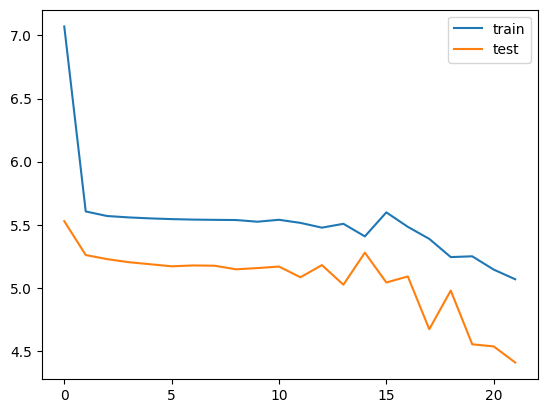

In [36]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()